In [2]:
import torch
import torch.nn as nn

In [3]:
#Image this is the Token embedding for the input sentence = "your joruney starts with one step"

inputs = torch.tensor(
 [[0.43, 0.15, 0.89],  # Your
 [0.55, 0.87, 0.66],  # journey
 [0.57, 0.85, 0.64],  # starts
 [0.22, 0.58, 0.33],  # with
 [0.77, 0.25, 0.10],  # one
 [0.05, 0.80, 0.55]] # step
)

<div class="alert alert-block alert-info">
<b>Causal Attention </b> 
<p>    
When we create the attention scores and context vectors from attention scores , we create the context of how each token is related or attended by opther token in inpit sequence

However, there is a <font color=red> problem </font>with this approach
What we do , is we consider all the tokens (previous and future) that are present before and after the token for which we creating the context vector.

How with Causal attention , we basically mask the future tokens , or tokens that appears after the input in the sequence.

This is done by making converting the tokens in attention matrix to "0" all other token that appears after the input in sequence

<font color=red> Note </font> , it is also called as masked attention.

<font color=red> In Short , it restricts the model to only consider previous and the current inputs in the sequence , when processing any given Token .

This is achieved by masking the future tokens which comes after the current token in input text
</font>

Example 

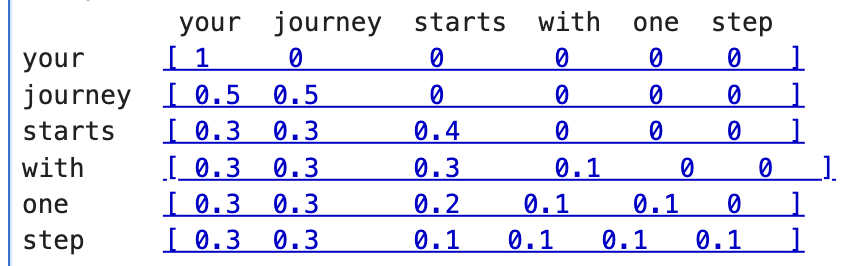

So if you say all the elements below diagonal have values and sum to 1
and all the values above diagonal are zero (meaning there are future values after the input and not considered

</p>
</div>

In [10]:
class SelfAttention_v2(nn.Module):
    def __init__(self, d_int , d_out, qkv_bias=False):
        super().__init__()

        # Step 1 :- Define the query , key and valye matrices with randowm values
        self.W_query = nn.Linear(d_in,d_out,bias=qkv_bias)
        self.W_key = nn.Linear(d_in,d_out,bias=qkv_bias)
        self.W_value = nn.Linear(d_in,d_out,bias=qkv_bias)

    def forward(self, x):

        # STep2 : create the key , queries and values by multiplying token embedding
        keys    = self.W_key(x)
        queries = self.W_query(x)
        values  = self.W_value(x)

        # Step 3 : Create attention scores 
        attention_scores = queries @ keys.T

        # Step 4 :- Normalize the attention scores by diding then with sqrt od dims and softmax
        attention_scores_norm = torch.softmax(
              attention_scores / keys.shape[-1]**0.5 , dim=-1
            )
        
        # Step 5: Create context vector
        context_vector = attention_scores_norm @ values
        return context_vector ,attention_scores_norm

In [11]:
torch.manual_seed(789)
d_in = inputs.shape[1]
d_out=2

sa_v2= SelfAttention_v2(d_in , d_out)
context , attention_scores = sa_v2(inputs)

In [12]:
print(attention_scores)

tensor([[0.1921, 0.1646, 0.1652, 0.1550, 0.1721, 0.1510],
        [0.2041, 0.1659, 0.1662, 0.1496, 0.1665, 0.1477],
        [0.2036, 0.1659, 0.1662, 0.1498, 0.1664, 0.1480],
        [0.1869, 0.1667, 0.1668, 0.1571, 0.1661, 0.1564],
        [0.1830, 0.1669, 0.1670, 0.1588, 0.1658, 0.1585],
        [0.1935, 0.1663, 0.1666, 0.1542, 0.1666, 0.1529]],
       grad_fn=<SoftmaxBackward0>)


---

<div class="alert alert-block alert-info">
<b>Causal Attention Masking Examples</b> 
<p>    
Lets look at some of the Masking exmaple using Torch Library
</p>
</div>

In [13]:
context_length = attention_scores.shape[0]
print(context_length)

6


In [15]:
# Torch Tril is to get the lower triangular 1

mask_example_1 = torch.tril(torch.ones(context_length,context_length))
print(mask_example_1)

tensor([[1., 0., 0., 0., 0., 0.],
        [1., 1., 0., 0., 0., 0.],
        [1., 1., 1., 0., 0., 0.],
        [1., 1., 1., 1., 0., 0.],
        [1., 1., 1., 1., 1., 0.],
        [1., 1., 1., 1., 1., 1.]])


In [17]:
# Torch Triu is to get the upper triangular 1

mask_example_2 = torch.triu(torch.ones(context_length,context_length))
print(mask_example_2)

tensor([[1., 1., 1., 1., 1., 1.],
        [0., 1., 1., 1., 1., 1.],
        [0., 0., 1., 1., 1., 1.],
        [0., 0., 0., 1., 1., 1.],
        [0., 0., 0., 0., 1., 1.],
        [0., 0., 0., 0., 0., 1.]])


In [18]:
masked_attention_score=attention_scores*mask_example_1
print(masked_attention_score)

tensor([[0.1921, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2041, 0.1659, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2036, 0.1659, 0.1662, 0.0000, 0.0000, 0.0000],
        [0.1869, 0.1667, 0.1668, 0.1571, 0.0000, 0.0000],
        [0.1830, 0.1669, 0.1670, 0.1588, 0.1658, 0.0000],
        [0.1935, 0.1663, 0.1666, 0.1542, 0.1666, 0.1529]],
       grad_fn=<MulBackward0>)


In [19]:
#torch.softmax(torch.tensor([[0.0,0.0,0.0],[0.0,0.9,0.0]]) , dim=1)

In [20]:
# Simple way to Normalize , just take the sum acorss columns and divide each value with sum
masked_attention_score / masked_attention_score.sum(dim=1)

tensor([[1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [1.0625, 0.4483, 0.0000, 0.0000, 0.0000, 0.0000],
        [1.0595, 0.4484, 0.3103, 0.0000, 0.0000, 0.0000],
        [0.9727, 0.4505, 0.3114, 0.2319, 0.0000, 0.0000],
        [0.9527, 0.4510, 0.3116, 0.2344, 0.1971, 0.0000],
        [1.0070, 0.4495, 0.3109, 0.2276, 0.1979, 0.1529]],
       grad_fn=<DivBackward0>)

---

<div class="alert alert-block alert-info">
<b>Causal Attention on raw Attention Score</b> 
<p>    
<font color=red> What ever we have seen above , we are using the  normalized attention scores . Meaning we are applying the softmax on attention scores and then using it as input to causual attention process </font>

This caused the issue . It is like we are already considering all the input tokens from sequence and then applying causual attention process on this one.

So , what we will do it , we will use the raw (un-normalized) attention score.
Lets start by creating V3 of self attention class , in which we use un-normalized version of attention score



</p>
</div>

In [21]:
class SelfAttention_v3(nn.Module):
    def __init__(self, d_int , d_out, qkv_bias=False):
        super().__init__()

        # Step 1 :- Define the query , key and valye matrices with randowm values
        self.W_query = nn.Linear(d_in,d_out,bias=qkv_bias)
        self.W_key = nn.Linear(d_in,d_out,bias=qkv_bias)
        self.W_value = nn.Linear(d_in,d_out,bias=qkv_bias)

    def forward(self, x):

        # STep2 : create the key , queries and values by multiplying token embedding
        keys    = self.W_key(x)
        queries = self.W_query(x)
        values  = self.W_value(x)

        # Step 3 : Create attention scores 
        attention_scores_raw = queries @ keys.T

        # Step 4 :- Normalize the attention scores by diding then with sqrt od dims and softmax
          # this is not to be done , as we need to un-normalized version of attention score
        
        # Step 5: Create context vector
           # will create later after casual attention process
        
        return  attention_scores_raw

In [22]:
torch.manual_seed(789)
d_in = inputs.shape[1]
d_out=2

sa_v3= SelfAttention_v3(d_in , d_out)
attention_scores_raw = sa_v3(inputs)

In [23]:
print(attention_scores_raw)

tensor([[ 0.2899,  0.0716,  0.0760, -0.0138,  0.1344, -0.0511],
        [ 0.4656,  0.1723,  0.1751,  0.0259,  0.1771,  0.0085],
        [ 0.4594,  0.1703,  0.1731,  0.0259,  0.1745,  0.0090],
        [ 0.2642,  0.1024,  0.1036,  0.0186,  0.0973,  0.0122],
        [ 0.2183,  0.0874,  0.0882,  0.0177,  0.0786,  0.0144],
        [ 0.3408,  0.1270,  0.1290,  0.0198,  0.1290,  0.0078]],
       grad_fn=<MmBackward0>)


<div class="alert alert-block alert-info">
<b>Causal Attention on raw Attention Score</b> 
<p>    
Now we have modified the Self Attention class to v3 and got the raw attention scores (This is not normalized)

Now , we will use this raw attention to be normalized using softmax function.
However , this is done by introduction the -inf ( -&#8734;) instead of one's.
The exponential of - &#8734; is 0 , so the influence of all future inputs from current inout will be gone auotmatically

This is how we can do it as below
</p>
</div>

In [24]:
# Create the tensor of ones using triu (upper training) , so that all the values of tensor above diagonal is 1.\ Tokenizer.ipynb
mask_matrix = torch.triu(torch.ones(context_length , context_length), diagonal=1)
print(mask_matrix)

tensor([[0., 1., 1., 1., 1., 1.],
        [0., 0., 1., 1., 1., 1.],
        [0., 0., 0., 1., 1., 1.],
        [0., 0., 0., 0., 1., 1.],
        [0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0.]])


In [25]:
# We create the masked attention score
# we mask fill raw attention score by finding values values that are True and replce with  &#8734; 


mask_attention_score = attention_scores_raw.masked_fill(mask_matrix.bool() , -torch.inf)
print(mask_attention_score)

tensor([[0.2899,   -inf,   -inf,   -inf,   -inf,   -inf],
        [0.4656, 0.1723,   -inf,   -inf,   -inf,   -inf],
        [0.4594, 0.1703, 0.1731,   -inf,   -inf,   -inf],
        [0.2642, 0.1024, 0.1036, 0.0186,   -inf,   -inf],
        [0.2183, 0.0874, 0.0882, 0.0177, 0.0786,   -inf],
        [0.3408, 0.1270, 0.1290, 0.0198, 0.1290, 0.0078]],
       grad_fn=<MaskedFillBackward0>)


In [26]:
# d_out :- has to be the shape[1] of keys Weight Matrix

attention_scores = torch.softmax(mask_attention_score / d_out**0.5 ,dim=1)
print(attention_scores)

tensor([[1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.5517, 0.4483, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.3800, 0.3097, 0.3103, 0.0000, 0.0000, 0.0000],
        [0.2758, 0.2460, 0.2462, 0.2319, 0.0000, 0.0000],
        [0.2175, 0.1983, 0.1984, 0.1888, 0.1971, 0.0000],
        [0.1935, 0.1663, 0.1666, 0.1542, 0.1666, 0.1529]],
       grad_fn=<SoftmaxBackward0>)


---

In [27]:
# Lets see how dropout worksabs
import torch
import torch.nn as nn

dropout = nn.Dropout(p=0.5)
#layer = nn.Linear(6, 3)  # next layer (just an example)

x = torch.ones((6, 6))   # input tensor
print("Input tensor:", x)
dropout.train()          # training mode

# Apply dropout
x_dropped = dropout(x)
print("Dropped tensor:", x_dropped)

# Pass into next layer
#out = layer(x_dropped)
#print("Next layer output:", out)


Input tensor: tensor([[1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1.]])
Dropped tensor: tensor([[2., 2., 0., 0., 2., 2.],
        [0., 0., 2., 0., 0., 2.],
        [0., 0., 2., 2., 0., 0.],
        [2., 2., 0., 2., 2., 2.],
        [0., 2., 2., 0., 0., 0.],
        [2., 2., 0., 0., 0., 0.]])


---

<div class="alert alert-block alert-info">
<b>Causal Attention on raw Attention Score</b> 
<p>    
We have no used raw attention score , and normalized using softmax by ignoring or masking the 
future tokens
</p>
</div>

---

<div class="alert alert-block alert-info">
<b>Causal Attention CLass</b> 
<p>    
Lets now create the CausalAttention Class with all the details seen above
Additionally we will include dropout , this is done to get attention score after normalization
</p>
</div>

In [28]:

# We will have dataloader that will build the datasets in batches
# we create a batch with 3 input , for simiplicity now
# meaning we will have 3 sentence , with 6 tokens each , and 3 dimension , in batch pf 3
batch=torch.stack((inputs,inputs,inputs),dim=0)

In [29]:
batch.shape

torch.Size([3, 6, 3])

<div class="alert alert-block alert-info">
<b>Causal Attention CLass</b> 
<p>    
The follwing CausalAttention class is similar to SelftAttention class . However we now a
and causal mask components
</p>
</div>

In [30]:
class CausalAttention(nn.Module):
    def __init__(self, d_int , d_out, context_length, dropout, qkv_bias=False):
        super().__init__()

        # Step 1 :- Define the query , key and valye matrices with randowm values
        self.W_query = nn.Linear(d_in,d_out,bias=qkv_bias)
        self.W_key = nn.Linear(d_in,d_out,bias=qkv_bias)
        self.W_value = nn.Linear(d_in,d_out,bias=qkv_bias)
        self.dropout = nn.Dropout(dropout)  # Define the dropout
        self.register_buffer('upper_mask_matrix' , torch.triu(torch.ones(context_length , context_length) , diagonal=1))
        

    def forward(self, x):

        # STep2 : create the key , queries and values by multiplying token embedding
        batch , num_tokens , test = x.shape
        keys    = self.W_key(x)
        queries = self.W_query(x)
        values  = self.W_value(x)

        # Step 3 : Create attention scores , these are raw attention score
        # The transpose(1,2) means just consider the data (tokens & dimensions) , as input has dimension = [ batch , token , dimension]
        attention_scores_raw = queries @ keys.transpose(1,2)

        # Step 4 :-  Implement the Causal Attention mechanism , buy masking future
        #            Input sequences after the given token
        attention_scores_raw.masked_fill_(
            self.upper_mask_matrix.bool()[:num_tokens , :num_tokens], -torch.inf) # [:num_tokens ,:num_tokens] is list comprehension .
                                                                            # If we have less tokens in one batch (E.g End of datasets with just 2 words) , to ensure it works we specify the dim  so it is broadcasted

        # Step 5 :- Normalize the attention scores by diding then with sqrt od dims and softmax
        attention_scores_norm = torch.softmax(
              attention_scores_raw / keys.shape[-1]**0.5 , dim=-1
            )


        # Step 6: Add the droput funtionality  . it is regularization method to prevent overfitting    
        attention_scores = self.dropout(attention_scores_norm)

        
        # Step 7: Create context vector
        context_vector = attention_scores @ values
        return context_vector

In [31]:
torch.manual_seed(123)
context_length = batch.shape[1]
d_int=batch.shape[2]
d_out=2

ca = CausalAttention(d_in , d_out , context_length , 0.0)
context_vector = ca(batch)

In [32]:
print(context_vector)

tensor([[[-0.4519,  0.2216],
         [-0.5874,  0.0058],
         [-0.6300, -0.0632],
         [-0.5675, -0.0843],
         [-0.5526, -0.0981],
         [-0.5299, -0.1081]],

        [[-0.4519,  0.2216],
         [-0.5874,  0.0058],
         [-0.6300, -0.0632],
         [-0.5675, -0.0843],
         [-0.5526, -0.0981],
         [-0.5299, -0.1081]],

        [[-0.4519,  0.2216],
         [-0.5874,  0.0058],
         [-0.6300, -0.0632],
         [-0.5675, -0.0843],
         [-0.5526, -0.0981],
         [-0.5299, -0.1081]]], grad_fn=<UnsafeViewBackward0>)
